In [2]:
from CommonFunctions import CVE_Functions
CVE_F = CVE_Functions.CVE()

In [10]:
def multiCVEtest(Ds, ntests):

    results = np.zeros([3, len(Ds), ntests])

    for i in np.arange(len(Ds)):
        for j in np.arange(ntests):
            DT = Ds[i]
            t = np.linspace(0, 100*DT, 1000) # make time series
            sigmaT = np.sqrt(2*(DT*np.diff(t)[0])) # get dimensionless translational diffusion cofficient (good explanation
            # in Allen, M. P.; Tildesley, D. J. Computer Simulation of Liquids, 2nd ed.; Oxford University Press, 2017)
            displacements = np.random.normal(loc=0, scale=sigmaT, size=(1, len(t)))
            coords = np.cumsum(displacements, axis=1)
            X = coords[0, :]
            results[:, i, j] = CVE_Eq14(X, t)
    return results

In [11]:
Ds = np.logspace(-1, 1, 10)
ntests = 10000
results = multiCVEtest(Ds, ntests)



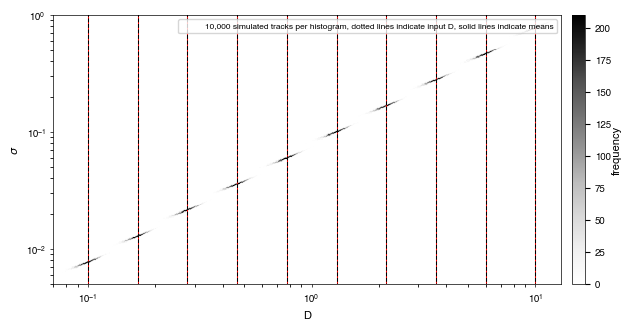

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.figsize'] = [7, 3.5]
plt.rcParams['font.size'] = 7

# panel labels are 8 point font, ticks are 7 point font, annotations and legends are 6 point font

# The maximum published width for a one-column
# figure is 3.33 inches (240 pt). The maximum width for a two-column
# figure is 6.69 inches (17 cm). The maximum depth of figures should be 8 ¼ in. (21.1 cm).

plt.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.linewidth'] = 0.5 # set the value globally
lw=0.75
lwg=0.25
lwax = 0.5

fig, axs = plt.subplots(1, 1)

for i in np.arange(1):
    axs.xaxis.set_tick_params(width=0.5, length=2)
    axs.yaxis.set_tick_params(width=0.5, length=2)

for i in np.arange(len(Ds)):
    x=results[0, i, :]
    y=np.sqrt(results[2, i, :])
    hist1 = axs.hist2d(x=x, y=y, bins=[bincalculator(x), bincalculator(y)], cmap='Greys');
    axs.vlines(x=np.mean(x), ymin=0, ymax=750, color='r', lw=lw)
    axs.vlines(x=Ds[i], ymin=0, ymax=750, ls='--', color='k', lw=lw)

cbar = plt.colorbar(hist1[3], fraction=0.045, pad=0.02, ax=axs, location='right')
cbar.set_label(r'frequency', rotation=90, labelpad=1, fontsize=8)
axs.plot(0, 0, label='10,000 simulated tracks per histogram, dotted lines indicate input D, solid lines indicate means', alpha=0)
plt.xlim(7e-2, 13)
plt.ylim(5e-3, 1)
plt.xscale('log')
plt.yscale('log')
axs.set_ylabel(r'$\sigma$', fontsize=8)
axs.set_xlabel('D', fontsize=8)
axs.legend(fontsize=6)

writefolder = '/home/jbeckwith/Documents/Dropbox (Cambridge University)/Chemistry/Lee/Talks+Posters/Subgroup/20230831/fig'
plt.savefig(os.path.join(writefolder, 'CVE_2D.svg'), format='svg', dpi=1200, transparent=True, bbox_inches='tight')
plt.show(block=False)

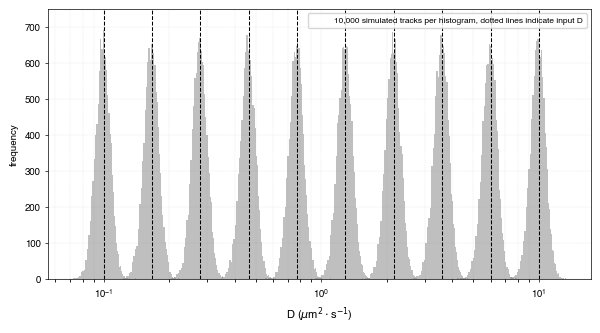

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.figsize'] = [7, 3.5]
plt.rcParams['font.size'] = 7

# panel labels are 8 point font, ticks are 7 point font, annotations and legends are 6 point font

# The maximum published width for a one-column
# figure is 3.33 inches (240 pt). The maximum width for a two-column
# figure is 6.69 inches (17 cm). The maximum depth of figures should be 8 ¼ in. (21.1 cm).

plt.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.linewidth'] = 0.5 # set the value globally
lw=0.75
lwg=0.25
lwax = 0.5

fig, axs = plt.subplots(1, 1)

for i in np.arange(1):
    axs.xaxis.set_tick_params(width=0.5, length=2)
    axs.yaxis.set_tick_params(width=0.5, length=2)


for i in np.arange(len(Ds)):
    axs.hist(results[0, i, :], bins=bincalculator(results[0, i, :]), color='gray', alpha=0.5)
    axs.vlines(x=Ds[i], ymin=0, ymax=750, ls='--', color='k', lw=lw)

axs.plot(0, 0, label='10,000 simulated tracks per histogram, dotted lines indicate input D, solid lines indicate means', alpha=0)
axs.set_ylim([0, 750])    
axs.grid(True,which="both",ls="--",c='gray', lw=lwg, alpha=0.25)  

axs.legend(fontsize=6)
axs.set_xscale('log')
axs.set_xlabel(r'D', fontsize=8)
axs.set_ylabel('frequency')
writefolder = '/home/jbeckwith/Documents/Dropbox (Cambridge University)/Chemistry/Lee/Talks+Posters/Subgroup/20230831/fig'

plt.savefig(os.path.join(writefolder, 'CVE.svg'), format='svg', dpi=1200, transparent=True, bbox_inches='tight')
plt.show(block=False)